# Preprocessing

## Import Data

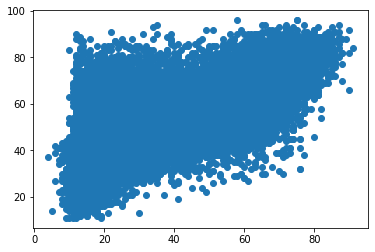

In [905]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/3842/datasets/2f0473692782600a2b7c0f7d4a0dc38295c87015/fifa_18_dataset.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8'))).to_numpy()
plt.scatter(X[:,0],X[:,1])

## STANDARDIZING of Data 

<b> Mean </b> = 0 <br>
<b> S.T.D </b> = 1

In [909]:
print(X.mean(-2))
print(X.std(-2))

[45.59208625 55.82810937]
[21.47677483 17.45511614]


In [910]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy = True, with_mean = True, with_std = True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [912]:
print(scaled_X.mean(-2))
print(scaled_X.std(-2))

[-1.45314953e-16  1.01088663e-16]
[1. 1.]


## NORMALIZING of Data 

rescales each sample - each column - independently of the other.

In [970]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [972]:
normalizer.fit(X)
X_normalized = normalizer.transform(X)

## Visualizing CLusters

In [ ]:
#MATPLOTLIB
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
df.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                       c=df['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

In [ ]:
# SEABORN
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data=comic_con)
plt.show()

# Hierarchical Clustering

TYPES::

<b> Agglomerative Hierarchical Clustering </b> :
- Every Sample initially has its own cluster
- At each Step 2 closest clusrers are merged
- Finally, only 1 cluster is left for the entire dataset


<b> Divisive Clustering </b> :
- Works the other Way around

## Format

Steps:
    - All points have their own cluster centers
    - Find closest clusters and merge them
    - Repeat

``` python
from scipy.cluster.hierarchy import linkage, fcluster
distance_matrix = linkage(df, 'ward')       #Create Distance Matrix
df['cluster_labels'] = fcluster(distance_matrix, 3, criterion = 'maxclust')
```

<b> Distance Matrix </b> :
``` python
linkage(data,
        method = 'single'
        metric  = 'euclidean' ,
        optimal_ordering= False)

```
<b> method = '????' </b>: <br>

| Method | Definition| 
| --- | --- |
| 'single' | Proximity is based on 2 closest objects | 
| 'complete' | based on 2 farthest objects | 
| 'average' | based on arithmetic mean of objects| 
| 'centroid' | based on geometric mean of objects| 
| 'median' | based on median of objects | 
| 'ward' | (Summed squares of joint clusters)  - (Individual summed squares)  | 

<b> Cluster Labels </b>: <br>
``` python
fcluster(distance_matrix, 
        num_clusters = 3,
        criterion = 'maxclust')
```

## Example

In [9]:
from scipy.cluster.hierarchy import linkage, fcluster

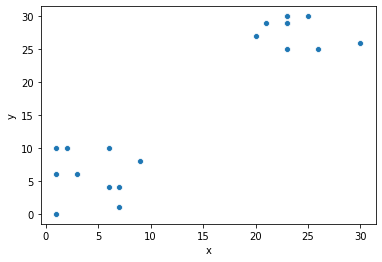

In [281]:
data = np.array([[ 9,  8],
       [ 6,  4],
       [ 2, 10],
       [ 3,  6],
       [ 1,  0],
       [ 7,  4],
       [ 1, 10],
       [ 6, 10],
       [ 1,  6],
       [ 7,  1],
       [23, 29],
       [26, 25],
       [25, 30],
       [23, 29],
       [21, 29],
       [23, 30],
       [23, 25],
       [20, 27],
       [30, 26],
       [23, 30]])
df=pd.DataFrame({'x':data[:,0],'y':data[:,1]})
_=sns.scatterplot(x='x', y='y', data=df)

In [283]:
distance_bw_intermediate_clusters = linkage(df, 'ward')
df['cluster_labels'] = fcluster(distance_bw_intermediate_clusters, 3, criterion = 'maxclust')

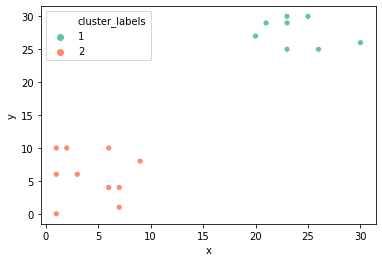

In [284]:
distance_bw_intermediate_clusters = linkage(df, 'ward')
df['cluster_labels'] = fcluster(distance_bw_intermediate_clusters, 2, criterion = 'maxclust')
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
_=sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df,palette="Set2")

## Comparision of Different Methods

'complete' linkage method:::: Distance b/w clusters = Max. Distance between their samples

In 'single' linkage:::::the distance between clusters is the distance between the closest points of the clusters.

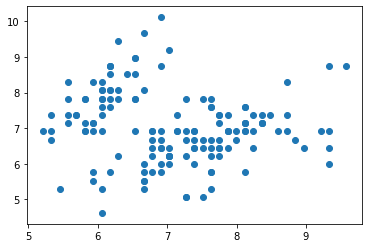

In [90]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [0,1]]
X = X/X.std(-2)               #Standardizing Data
df=pd.DataFrame({'x':X[:,0],'y':X[:,1]})
plt.scatter(X[:,0],X[:,1])

In [ ]:
from scipy.cluster.hierarchy import fcluster, linkage

In [94]:
distance_matrix_ward = linkage(df, method = 'ward', metric = 'euclidean')
df['cluster_labels_ward'] = fcluster(distance_matrix_ward, 2, criterion='maxclust')

distance_matrix_single = linkage(df[['x', 'y']], method = 'single', metric = 'euclidean')
df['cluster_labels_single'] = fcluster(distance_matrix_single, 2, criterion='maxclust')

distance_matrix_complete = linkage(df[['x', 'y']], method = 'complete', metric = 'euclidean')
df['cluster_labels_complete'] = fcluster(distance_matrix_complete, 2, criterion='maxclust')

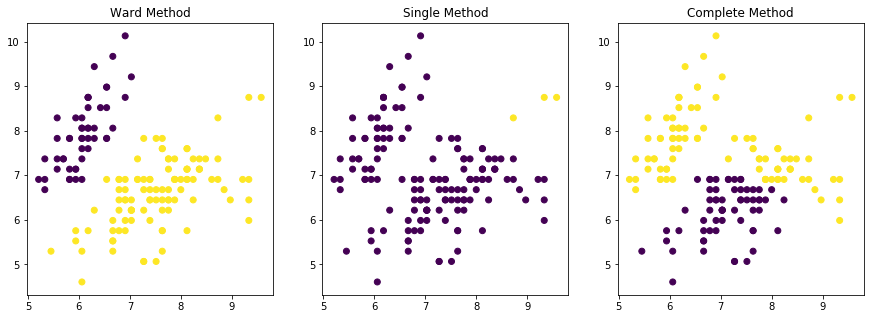

In [106]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].scatter(df['x'], df['y'], c=df['cluster_labels_ward'])
_=axs[0].set_title('Ward Method')
axs[1].scatter(df['x'], df['y'], c=df['cluster_labels_single'])
_=axs[1].set_title('Single Method')
axs[2].scatter(df['x'], df['y'], c=df['cluster_labels_complete'])
_=axs[2].set_title('Complete Method')

## Dendrogram

### Simple Example

In [107]:
from scipy.cluster.hierarchy import dendrogram

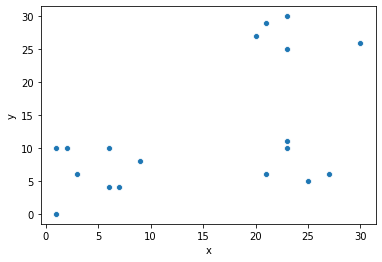

In [163]:
data = np.array([[ 9,  8],
       [ 6,  4],
       [ 2, 10],
       [ 3,  6],
       [ 1,  0],
       [ 7,  4],
       [ 1, 10],
       [ 6, 10],
       [21, 29],
       [23, 30],
       [23, 25],
       [20, 27],
       [30, 26],
       [23, 10],
        [25, 5],
        [27, 6],
        [23, 11],
        [21,6]])
df=pd.DataFrame({'x':data[:,0],'y':data[:,1]})
_=sns.scatterplot(x='x', y='y', data=df)

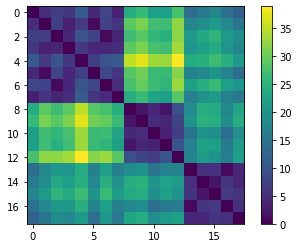

In [164]:
XX = df.to_numpy()
from sklearn.metrics.pairwise import euclidean_distances
plt.imshow(euclidean_distances(XX, XX))
plt.colorbar()

In [165]:
distance_matrix_ward = linkage(df, method = 'ward', metric = 'euclidean')

<b> Dendrogram </b>:
- Each Inverted - U = one cluster
- Ivtered U @ top of figure = Single cluster of all Data points
- Width of U = Distance b/w two children of cluster
- No. of vertical line the Horizontal Line interstects = # of clusters
- Distance b/w vertical lines = Intercluster Distance

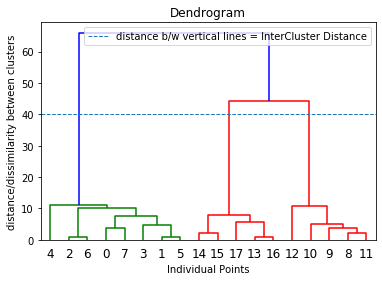

In [166]:
_=dendrogram(distance_matrix_ward)
plt.xlabel('Individual Points')
plt.ylabel('distance/dissimilarity between clusters')
_=plt.title('Dendrogram')
plt.axhline(40, ls='--', lw='1', label= 'distance b/w vertical lines = InterCluster Distance')
plt.legend()

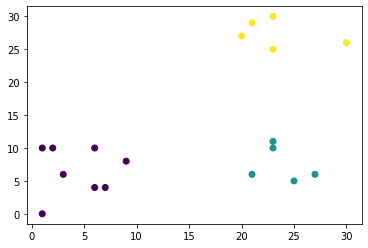

In [172]:
distance_matrix_ward = linkage(df, method = 'ward', metric = 'euclidean')
df['cluster_labels_ward'] = fcluster(distance_matrix_ward, 3, criterion='maxclust')
plt.scatter(df['x'], df['y'], c=df['cluster_labels_ward'])

### Real World Example

In [1071]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [1086]:
url="https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8')))
X.head(3)

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021


In [1087]:
movements = X.to_numpy()
companies = movements[:,0]
movements = movements[:,np.arange(1,964)]

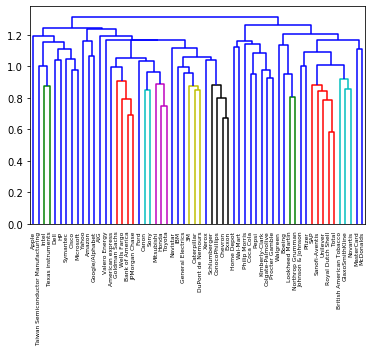

In [1089]:
from sklearn.preprocessing import normalize
normalized_movements = normalize(movements)


mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=6
)
plt.show()


### Extracting Intermediate Clusters

- y axis in Dendrogram = Distance Between CLusters

In [1090]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import normalize

In [1109]:
spcs = []
for i in iris.target:
    if i==0:
        spcs.append(iris.target_names[0])
    if i==1:
        spcs.append(iris.target_names[1])
    if i==2:
        spcs.append(iris.target_names[2])

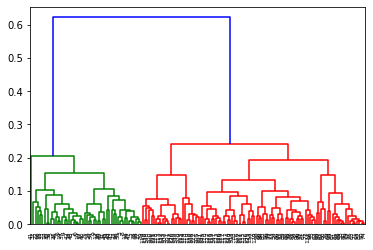

In [1098]:
##DATA
from sklearn.datasets import load_iris
data = load_iris()
X = iris.data
X = normalize(X)

mergings = linkage(X, method='complete')
dendrogram(
    mergings,
    leaf_rotation=90,
    leaf_font_size=6
)
plt.show()

In [1110]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 0.22, criterion='distance')       #0.22 = Dendrogram Height

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'species': spcs})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

ct


species,setosa,versicolor,virginica
labels,,,
1,50,0,0
2,0,0,26
3,0,50,24


## Limitations(Exponential Increase in Time)

In [264]:
from scipy.cluster.hierarchy import linkage, fcluster
import random

In [258]:
def data(points = 500):
    x = np.array(random.sample(range(0,points), points)).reshape(points,1)
    y = np.array(random.sample(range(0,points), points)).reshape(points,1)
    X = np.concatenate((x,y), axis=-1)
    return X
points = [500*(i+1) for i in range(20)]
DATA = []
for i in points:
    DATA.append(data(points = i))

In [259]:
import time
times = []
for i in DATA:
    tik = time.time()
    distance_matrix = linkage(i, 'ward')
    elapsed = time.time() - tik
    times.append(elapsed)

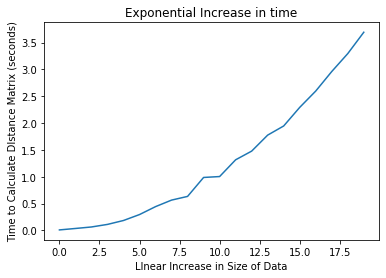

In [270]:
plt.plot(times)
_=plt.xlabel("LInear Increase in Size of Data")
_=plt.ylabel("Time to Calculate DIstance Matrix (seconds)")
_=plt.title("Exponential Increase in time")

- Vertical LInes = Clusters
- Joininig of Vertical Lines = Merging of CLusters

# K-Means Clustering

## Format

<b> Generating Cluster Centroids: </b>
``` python
from scipy.cluster.vq import kmeans, vq

cluster_centers, distortion = kmeans(X_stdandardized,
                                     k_or_guess = ,           #Number of Clusters
                                     iter = ,                  #Default = 20
                                     thresh = ,               #Default 1e-05
                                     check_finite = )   #Default = True (Check whether data contains only finite numbers)    

```
distortion  : Sum of Squares of distances from Centroids to corresponding points in clusters
<br> <br>
<b> Generating Cluster Labels: </b>
``` python
df['cluster_labels'],distortions_vq = vq(X_stdandardized, cluster_centers, check_finite = True)

```

distortions_vq = List of distortions(one for each data point)

## Example

In [301]:
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/3842/datasets/2f0473692782600a2b7c0f7d4a0dc38295c87015/fifa_18_dataset.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8')))
df = X
df = df.astype(float)

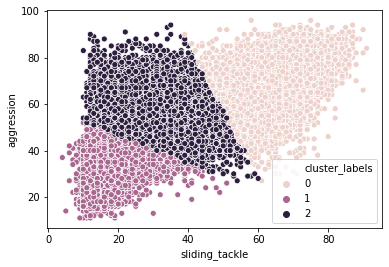

In [302]:
centroids, _ = kmeans(df, 3)
df['cluster_labels'],_ = vq(df, centroids)
_=sns.scatterplot(x='sliding_tackle', y='aggression', data=df, hue='cluster_labels')

## Selecting Number of Clusters

<b> Methods to Determine Ideal CLuster Size </b>:
- Elbow-Method  (FAILS when data is evenly distributed)
- Average Silhoutte Method
- Gap Statistic Method

<b> ELBOW METHOD </b> :

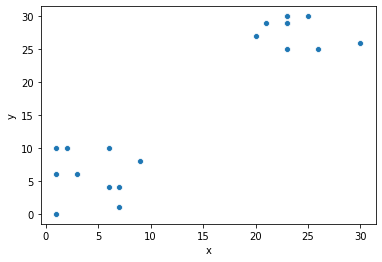

In [328]:
#DATA
data = np.array([[ 9,  8],
       [ 6,  4],
       [ 2, 10],
       [ 3,  6],
       [ 1,  0],
       [ 7,  4],
       [ 1, 10],
       [ 6, 10],
       [ 1,  6],
       [ 7,  1],
       [23, 29],
       [26, 25],
       [25, 30],
       [23, 29],
       [21, 29],
       [23, 30],
       [23, 25],
       [20, 27],
       [30, 26],
       [23, 30]])
df=pd.DataFrame({'x':data[:,0],'y':data[:,1]})
df = df.astype(float)
_=sns.scatterplot(x='x', y='y', data=df)

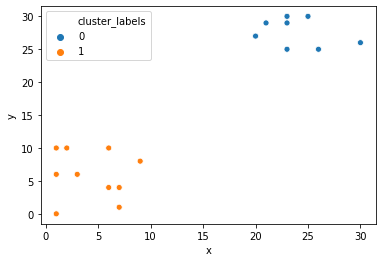

In [379]:
centroids, _ = kmeans(df, 2)
df['cluster_labels'],_ = vq(df, centroids)
_=sns.scatterplot(x='x', y='y', data=df, hue='cluster_labels')

In [448]:
distortions_cache = []
cluster_size = range(1,20)

In [449]:
for i in cluster_size:
    centroids, distortion = kmeans(df, i)
    distortions_cache.append(distortion)

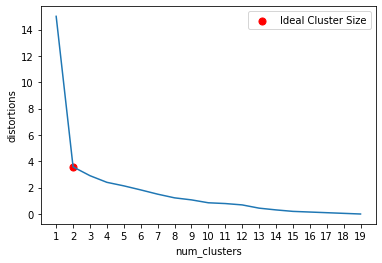

In [452]:
elbow_plot = pd.DataFrame({'num_clusters': cluster_size, 'distortions':distortions_cache})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(cluster_size)
plt.scatter(2,distortions_cache[2-1], c='r', s=50, label='Ideal Cluster Size')
plt.legend()

In [453]:
distortions_cache = np.array(distortions_cache)
def sliding_window_slicing(a, no_items, item_type=0):
    """This method perfoms sliding window slicing of numpy arrays

    Parameters
    ----------
    a : numpy
        An array to be slided in subarrays
    no_items : int
        Number of sliced arrays or elements in sliced arrays
    item_type: int
        Indicates if no_items is number of sliced arrays (item_type=0) or
        number of elements in sliced array (item_type=1), by default 0

    Return
    ------
    numpy
        Sliced numpy array
    """
    if item_type == 0:
        no_slices = no_items
        no_elements = len(a) + 1 - no_slices
        if no_elements <=0:
            raise ValueError('Sliding slicing not possible, no_items is larger than ' + str(len(a)))
    else:
        no_elements = no_items                
        no_slices = len(a) - no_elements + 1
        if no_slices <=0:
            raise ValueError('Sliding slicing not possible, no_items is larger than ' + str(len(a)))

    subarray_shape = a.shape[1:]
    shape_cfg = (no_slices, no_elements) + subarray_shape
    strides_cfg = (a.strides[0],) + a.strides
    as_strided = np.lib.stride_tricks.as_strided #shorthand
    return as_strided(a, shape=shape_cfg, strides=strides_cfg)
strided_data = sliding_window_slicing(distortions_cache, len(distortions_cache)-1, item_type=0)
print("Ideal Cluster Size :::" ,list(cluster_size)[np.argmax(strided_data[:,0] - strided_data[:,1])+1])

Ideal Cluster Size ::: 2


<b> ELBOW METHOD ON UNIFORM DATA </b> :

Ideal Number of Clusters Can not be determined!!

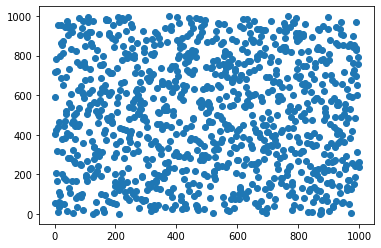

In [459]:
def data(points = 500):
    x = np.array(random.sample(range(0,points), points)).reshape(points,1)
    y = np.array(random.sample(range(0,points), points)).reshape(points,1)
    X = np.concatenate((x,y), axis=-1)
    return X
X = data(1000)
plt.scatter(X[:,0],X[:,1])
df=pd.DataFrame({'x':X[:,0],'y':X[:,1]})
df = df.astype(float)


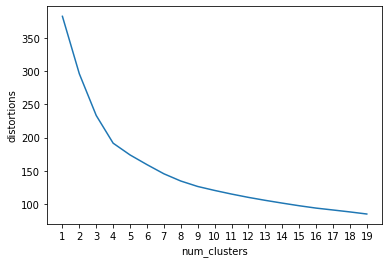

In [466]:
distortions_cache = []
cluster_size = range(1,20)
for i in cluster_size:
    centroids, distortion = kmeans(df, i)
    distortions_cache.append(distortion)
_=elbow_plot = pd.DataFrame({'num_clusters': cluster_size, 'distortions':distortions_cache})
_=sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
_=plt.xticks(cluster_size)

## Limitations

- Finding Ideal Number of Clusters
- Impact of Seeds on Clustering
- <b> Biased toward Equal Sized Clusters </b>  (Minimizing Distortion leads in clusters having <b> similar areas </b> , not necessarily the similar number of data points)

<b> Impact of Seeds </b>:
 - Set a constant seed to overcome this problem
``` python
from numpy import random
random.seed(0)
```

<b> Biased toward Equal Sized Clusters </b>:

In [515]:
#DATA
X1 = np.random.normal(loc = [0.2, 0.7], scale = 0.05, size = [200,2])
X2 = np.random.normal(loc = [0.5, 0.5], scale = 0.08, size = [2000,2])
X3 = np.random.normal(loc = [0.8, 0.7], scale = 0.05, size = [200,2])
X = np.concatenate((X1, X2, X3))
X=X/X.std(-2)

In [516]:
df=pd.DataFrame({'x':X[:,0],'y':X[:,1]})

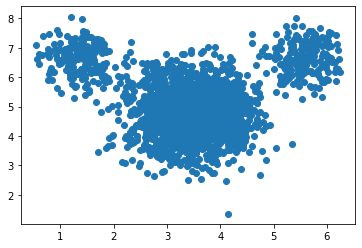

In [517]:
plt.scatter(X[:,0],X[:,1])

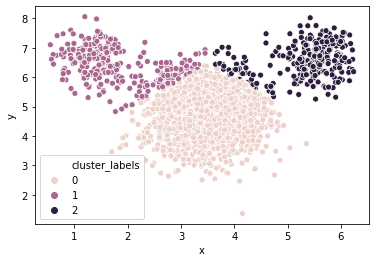

In [518]:
from scipy.cluster.vq import kmeans, vq
cluster_centers, distortion = kmeans(df[['x', 'y']], 3)
df['cluster_labels'], distortion_list = vq(df[['x', 'y']], cluster_centers)
sns.scatterplot(x='x', y='y', 
                hue='cluster_labels', data = df)
plt.show()

## SKLEARN

### Format

``` python
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(data)
cluster_labels = model.predict(data)

centroids = model.cluster_centers_      #rows = centroids of corresponding cluters

model.interia_   #Final COst Funtion of Model (USed to Evalue Clustering SOlution for different # of Clusters, scree plot)

```

### Example

In [873]:
##DATA
from sklearn.datasets import load_iris
data = load_iris()
X = iris.data
X = X[:,[0,1]]

In [874]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(X)
cluster_labels = model.predict(X)
centroids = model.cluster_centers_          #rows = centroids of corresponding cluters

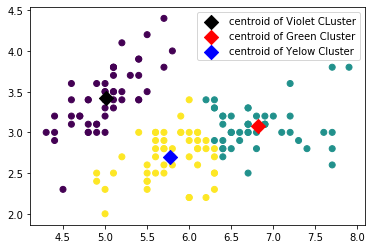

In [872]:
plt.scatter(X[:,0], X[:,1], c = cluster_labels, marker='o')
plt.scatter(centroids[0,0], centroids[0,1], c = 'k', marker='D',s = 100, label='centroid of Violet CLuster')
plt.scatter(centroids[1,0], centroids[1,1], c = 'r', marker='D',s = 100, label='centroid of Green Cluster')
plt.scatter(centroids[2,0], centroids[2,1], c = 'b', marker='D',s = 100, label='centroid of Yelow Cluster')
plt.legend()

### Pipeline for PReprocessing + Clustering

In [957]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
spcs = []
for i in wine.target:
    if i==0:
        spcs.append(0)
    if i==1:
        spcs.append(1)
    if i==2:
        spcs.append(2)

In [958]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [964]:
scaler = StandardScaler()
model = KMeans(n_clusters = 3)

In [965]:
pipeline = make_pipeline(scaler, model)
pipeline.fit(X)
cluster_labels_scaled_data = pipeline.predict(X)

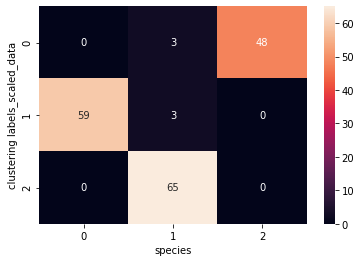

In [966]:
df_scaled = pd.DataFrame({'clustering labels_scaled_data':cluster_labels_scaled_data,  'species':spcs})
cross_tab_scaled = pd.crosstab(df_scaled['clustering labels_scaled_data'],df_scaled['species'])
sns.heatmap(cross_tab_scaled, annot=True)

<b> RAW UNSCALED DATA:::::: </b>

In [967]:
model_unscaled = KMeans(n_clusters = 3)
model_unscaled.fit(X)
cluster_labels_raw_data = model_unscaled.predict(X)

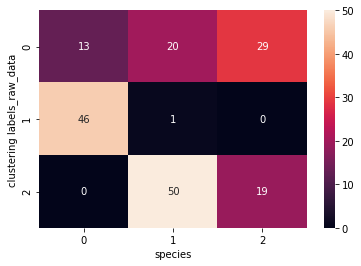

In [968]:
df_raw = pd.DataFrame({'clustering labels_raw_data':cluster_labels_raw_data ,  'species':spcs})
cross_tab_raw = pd.crosstab(df_raw['clustering labels_raw_data'],df_raw['species'])
sns.heatmap(cross_tab_raw, annot=True)

### Evalutaing A CLustering

#### Cross=Tabulations ( When Labels are Know)

<b> Cross- Tabulations:::  </b>

In [896]:
from sklearn.datasets import load_iris
data = load_iris()
X = iris.data

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(X)
cluster_labels = model.predict(X)
centroids = model.cluster_centers_          #rows = centroids of corresponding cluters

In [897]:
spcs = []
for i in iris.target:
    if i==0:
        spcs.append(iris.target_names[0])
    if i==1:
        spcs.append(iris.target_names[1])
    if i==2:
        spcs.append(iris.target_names[2])

In [898]:
import pandas as pd
df = pd.DataFrame({'clustering labels':cluster_labels ,  'species':spcs})

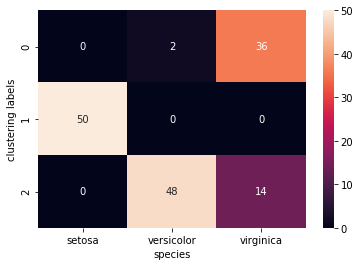

In [899]:
cross_tab = pd.crosstab(df['clustering labels'],df['species'])
sns.heatmap(cross_tab, annot=True)

<b> Note </b> : Virginica is not clustered properly. Ambiguity in Clustering SOlution

#### Inertia Method ( When Labels are Un-Know)

Inertia : Measures how spread out the clusters are( lower the better)
 - Measures how far samples are from the centroids

In [900]:
from sklearn.datasets import load_iris
data = load_iris()
X = iris.data

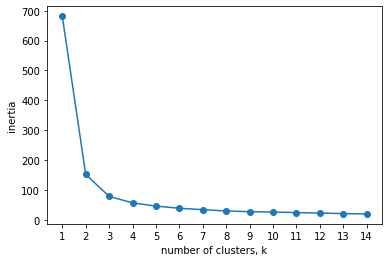

In [902]:
ks = range(1, 15)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# t-SNE

## Example - 1

In [1132]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data
Y= iris.target
spcs = []
for i in iris.target:
    if i==0:
        spcs.append(iris.target_names[0])
    if i==1:
        spcs.append(iris.target_names[1])
    if i==2:
        spcs.append(iris.target_names[2])

In [1133]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate = 100)      #50-200
trasnformed_X = model.fit_transform(X)

In [1134]:
df = pd.DataFrame({'x': trasnformed_X[:,0] ,'y':trasnformed_X[:,1] , 'species':spcs})

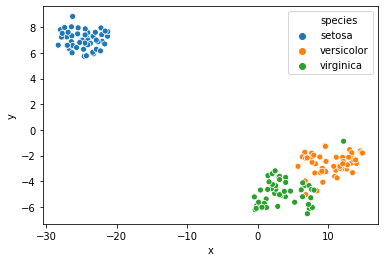

In [1135]:
import seaborn as sns
sns.scatterplot(x='x', y='y', data = df, hue='species')

## Example - 2

In [1139]:
url="https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8')))
movements = X.to_numpy()
companies = movements[:,0]
movements = movements[:,np.arange(1,964)]
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()  
movements_normalized = normalizer.fit_transform(movements)

In [1140]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(movements_normalized)

In [1154]:
xs = tsne_features[:,0]
ys = tsne_features[:,1]

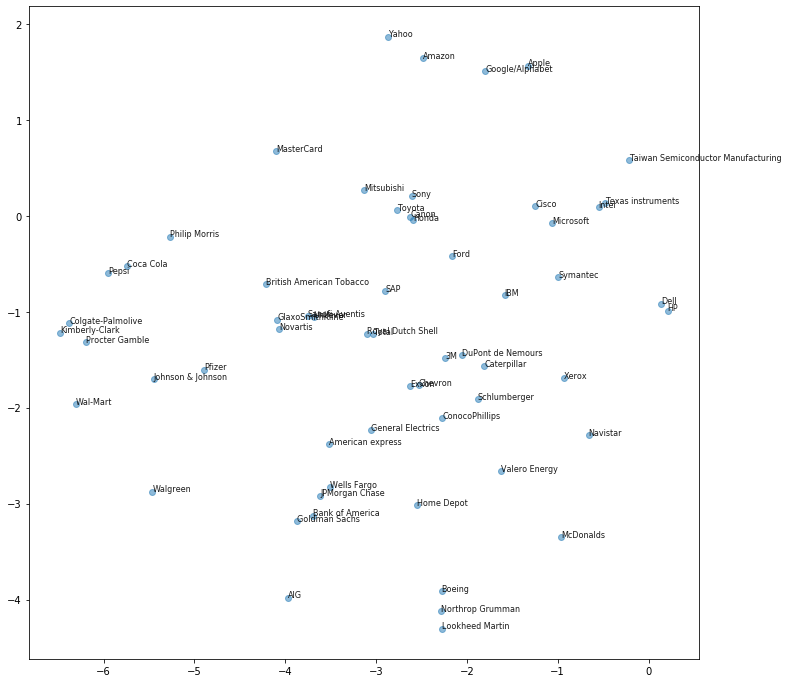

In [1160]:
plt.figure(figsize=(12,12))
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=8, alpha=0.9)
plt.show()

# Dimension Reduction

## PCA

### Decorrelation

In [1166]:
from sklearn.datasets import load_iris
data = load_iris()
X=data.data
X=X[:,[0,3]]

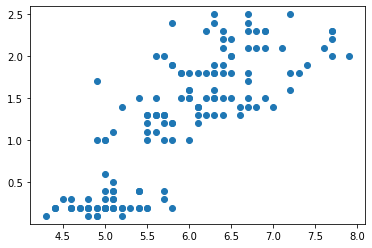

COrrelation::: 0.8179411262715757


In [1169]:
from scipy.stats import pearsonr
# Scatter plot width vs length
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(X[:,0], X[:,1])
print("COrrelation:::",correlation)

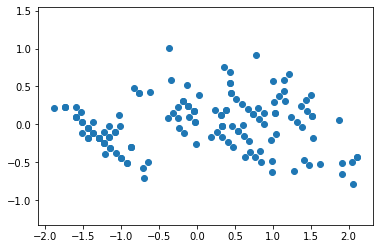

-6.938893903907228e-17


In [1170]:
from sklearn.decomposition import PCA
model = PCA()
pca_features = model.fit_transform(X)

xs = pca_features[:,0]
ys = pca_features[:,1]


plt.scatter(xs, ys)
plt.axis('equal')
plt.show()


correlation, pvalue = pearsonr(xs, ys)
print(correlation)

### Finding Intrinsic Dimension

#### Plotting Principal Components

In [1172]:
from sklearn.datasets import load_iris
data = load_iris()
X=data.data
X=X[:,[0,3]]

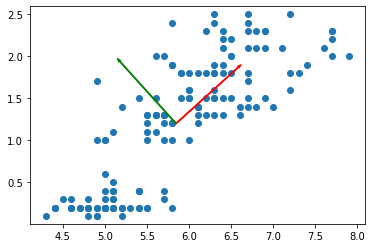

In [1181]:
plt.scatter(X[:,0], X[:,1])
model = PCA()
model.fit(X)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()


#### Scree Plot

In [1182]:
from sklearn.datasets import load_iris
data = load_iris()
X=data.data

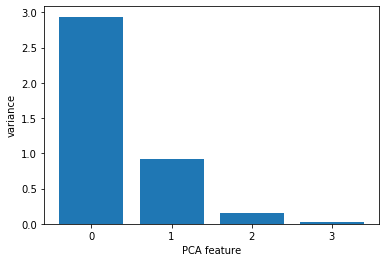

In [1186]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
_=plt.xticks(features)

#### Dimension Reduction

In [1198]:
from sklearn.datasets import load_iris
data = load_iris()
X=data.data
spcs = []
for i in iris.target:
    if i==0:
        spcs.append(0)
    if i==1:
        spcs.append(1)
    if i==2:
        spcs.append(2)

In [1199]:
scaler = StandardScaler()
pca = PCA(n_components = 2)
pipeline = make_pipeline(scaler, pca)
pipeline.fit(X)
X_transformed = pipeline.transform(X)

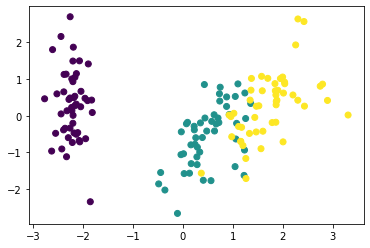

In [1200]:
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=spcs)

### PCA for TEXT - Data

<b> NOTE :: </b>: Scikit Learn PCA does not support sparse matrix data (eg: tf-idf matrix)
 Thus, use <b> TuncatedSVD </b> 

#### Simple Example

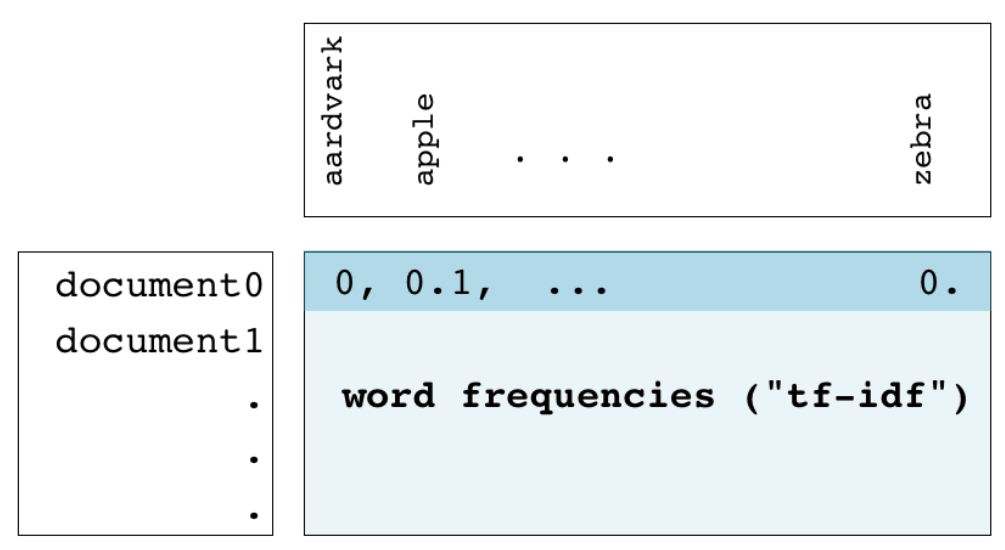

In [1201]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [1202]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer() 
csr_mat = tfidf.fit_transform(documents)        #CSR matrix(sparse matrix) 

# Print result of toarray() method
print(csr_mat.toarray())


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


In [1204]:
# Get the words: words
words = tfidf.get_feature_names()
# Print words
print(words)

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


####  Clustering Movie Plots

In [1254]:
url="https://assets.datacamp.com/production/repositories/3842/datasets/8bae4cc436725404038a278f6439b096bebbfd34/movies_plot.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8'))).to_numpy()
plots = X[:,1]

In [1261]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=1000,
                                   min_df=0.1, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)       #OUTPUT + SPARSE MATRIX

In [1263]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)
pipeline.fit(tfidf_matrix)

Pipeline(memory=None,
         steps=[('truncatedsvd',
                 TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
                              random_state=None, tol=0.0)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=6, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [1264]:
# Calculate the cluster labels: labels
labels = pipeline.predict(tfidf_matrix)

In [1265]:
terms = tfidf_vectorizer.get_feature_names()       

In [1266]:
movies = X[:,0]
# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'Movies': movies})
# Display df sorted by cluster label
df.sort_values('label').head(25)

,label,Movies
491,0,She Cried No
226,0,The Farmer in the Dell
225,0,Just Friends
508,0,Kiss Me Goodbye
717,0,Management
222,0,My Cousin Rachel
718,0,She-Devil
444,0,What's Love Got to Do with It
218,0,Larger Than Life
217,0,Butterfly


## Non-negative matrix factorization

### Intro

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
- Dimension Reduction Technique <br>
- Interpretbale unlike PCA

</p>

<div class="alert alert-block alert-danger">
<b>NOTE!!</b> 
<ul>
    <li>All samples must be Non-Negative (>=0)</li>
    
</ul>
</div>

Note : Can Work With Sparse Matrices(eg:tf-idf) Unlike Sklearn's kmeans

### Example - 1 (Text)

#### Data

In [1302]:
##DATA
url="https://assets.datacamp.com/production/repositories/3842/datasets/8bae4cc436725404038a278f6439b096bebbfd34/movies_plot.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8'))).to_numpy()
plots = X[:,1]
movie_names = X[:,0]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=1000,
                                   min_df=0.1, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)      
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_matrix[0]

# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(3)

,tfidf
town,0.467344
arrives,0.256122
decides,0.243121


In [1285]:
tfidf_matrix.shape

(1000, 172)

#### Model

In [1286]:
from sklearn.decomposition import NMF
model = NMF(n_components=6)
model.fit(tfidf_matrix)
nmf_features = model.transform(tfidf_matrix)

#### NMF Features

In [1303]:
print(nmf_features)
print("******************")
print(nmf_features.shape)

[[0.10942814 0.04902475 0.         0.08441596 0.         0.01021884]
 [0.09135234 0.02624873 0.         0.07138768 0.02642375 0.        ]
 [0.00382521 0.         0.00659208 0.         0.25658559 0.10734789]
 ...
 [0.00620418 0.         0.02530019 0.09363173 0.         0.        ]
 [0.04637881 0.02532478 0.         0.16171067 0.02779045 0.00910473]
 [0.         0.27623506 0.         0.         0.         0.        ]]
******************
(1000, 6)


In [1322]:
df_nmf_features = pd.DataFrame(nmf_features, index=movie_names)
df_nmf_features.head(3)

,0,1,2,3,4,5
The Ballad of Cable Hogue,0.109428,0.049025,0.000000,0.084416,0.000000,0.010219
Monsters vs. Aliens,0.091352,0.026249,0.000000,0.071388,0.026424,0.000000
The Bandit Queen,0.003825,0.000000,0.006592,0.000000,0.256586,0.107348


In [1323]:
print(df_nmf_features.loc['Act of Love'])
print(df_nmf_features.loc['That Kind of Woman'])

0    0.112073
1    0.000000
2    0.006187
3    0.071386
4    0.000000
5    0.000000
Name: Act of Love, dtype: float64
0    0.083242
1    0.000000
2    0.117068
3    0.041300
4    0.000000
5    0.000000
Name: That Kind of Woman, dtype: float64


#### NMF Components

 - 6 components
 - Each Component lives in 172-D(Dimension of tf-idf / Input) Space
 - <b>NMF Components Represents Topics </b>

In [1309]:
model.components_.shape

(6, 172)

In [1310]:
components_df = pd.DataFrame(model.components_, columns=tfidf_vectorizer.get_feature_names())
components_df.head(3)

,able,accidentally,agrees,american,appears,arrive,arrives,asks,attack,attempt,...,way,wife,woman,work,working,world,year,years,york,young
0,0.079001,0.095213,0.231397,0.000000,0.088277,0.026752,0.189506,0.346604,0.000000,0.070257,...,0.212951,0.372811,0.371173,0.288543,0.170399,0.071774,0.166436,0.177854,0.341398,0.263806
1,0.080890,0.115170,0.030878,0.000000,0.072344,0.138145,0.125882,0.047719,0.030389,0.067701,...,0.079607,0.191128,0.052456,0.073944,0.012764,0.000000,0.008621,0.024566,0.042308,0.011310
2,0.000000,0.000000,0.019964,0.187542,0.068713,0.000000,0.000000,0.007404,0.000000,0.000900,...,0.000000,0.149408,0.063539,0.042272,0.036197,0.036601,0.026470,0.060955,0.125247,0.052686


<b> Both Love Movies have Large 1st NMF Comnponents </b> :::

In [1326]:
print(df_nmf_features.loc['Act of Love'])
print(df_nmf_features.loc['That Kind of Woman'])

0    0.112073
1    0.000000
2    0.006187
3    0.071386
4    0.000000
5    0.000000
Name: Act of Love, dtype: float64
0    0.083242
1    0.000000
2    0.117068
3    0.041300
4    0.000000
5    0.000000
Name: That Kind of Woman, dtype: float64


In [1328]:
# Select row 0: component
first_component = components_df.iloc[0]
# Print result of nlargest
print(first_component.nlargest(10))

home     0.694047
love     0.676598
tells    0.645263
new      0.603056
house    0.508058
day      0.478105
night    0.469640
town     0.465415
time     0.462997
goes     0.458192
Name: 0, dtype: float64


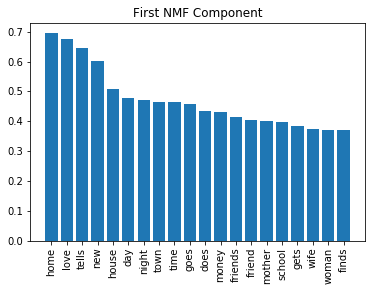

In [1356]:
plt.bar(np.arange(20),first_component.nlargest(20))
_=plt.xticks(np.arange(20),list(first_component.nlargest(20).index), rotation = 'vertical')
_=plt.title("First NMF Component")

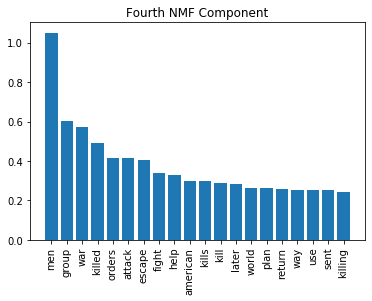

In [1355]:
fourth_component = components_df.iloc[3]
plt.bar(np.arange(20),fourth_component.nlargest(20))
_=plt.xticks(np.arange(20),list(fourth_component.nlargest(20).index), rotation = 'vertical')
_=plt.title("Fourth NMF Component")

### Example - 2 (Images)

#### NMF

- NMF learns the parts of images

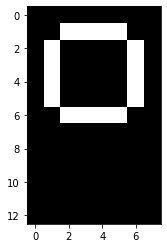

In [1377]:
url="https://assets.datacamp.com/production/repositories/655/datasets/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv"
s=requests.get(url).content
digits=pd.read_csv(io.StringIO(s.decode('utf-8'))).to_numpy()
_=plt.imshow(digits[0,:].reshape(13,8), cmap='gray',interpolation='nearest')

In [1374]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [1375]:
from sklearn.decomposition import NMF
model = NMF(n_components=7)
features = model.fit_transform(digits)
features.shape

(99, 7)

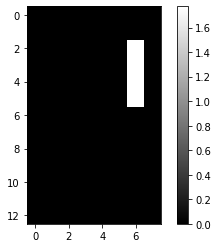

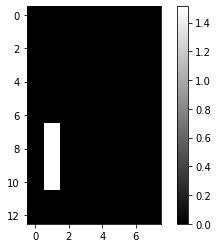

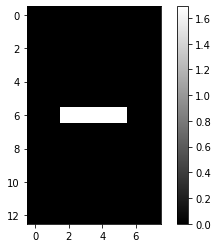

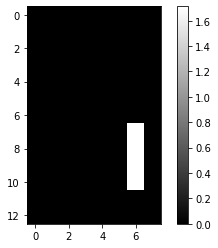

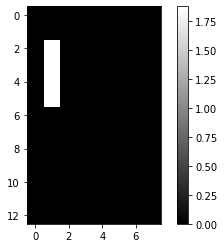

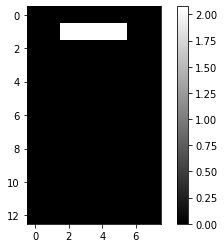

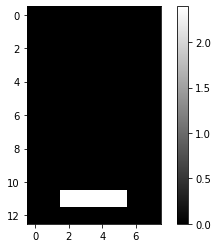

In [1380]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [1381]:
# Select the 0th row of features: digit_features
digit_features = features[0,:]
# Print digit_features
print(digit_features)

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


#### NMF vs PCA

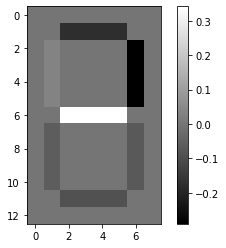

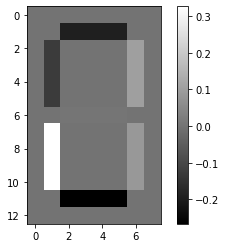

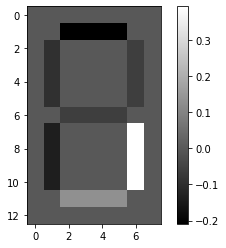

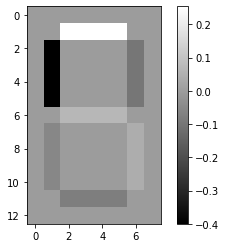

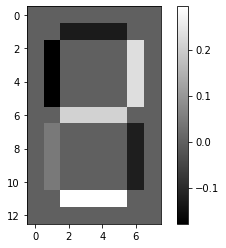

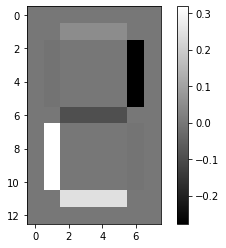

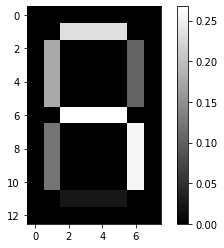

In [1382]:
from sklearn.decomposition import PCA
model = PCA(n_components=7)
features = model.fit_transform(digits)


for component in model.components_:
    show_as_image(component)    

### Example - 3 :: Recommender Systems - Movies

- Finding Similar Articles having similar topics

- Apply NMF to TF-IDF of articles
- Get NMF Features
<br><br><br>
 - Cmparing Atricles using NMF Features??

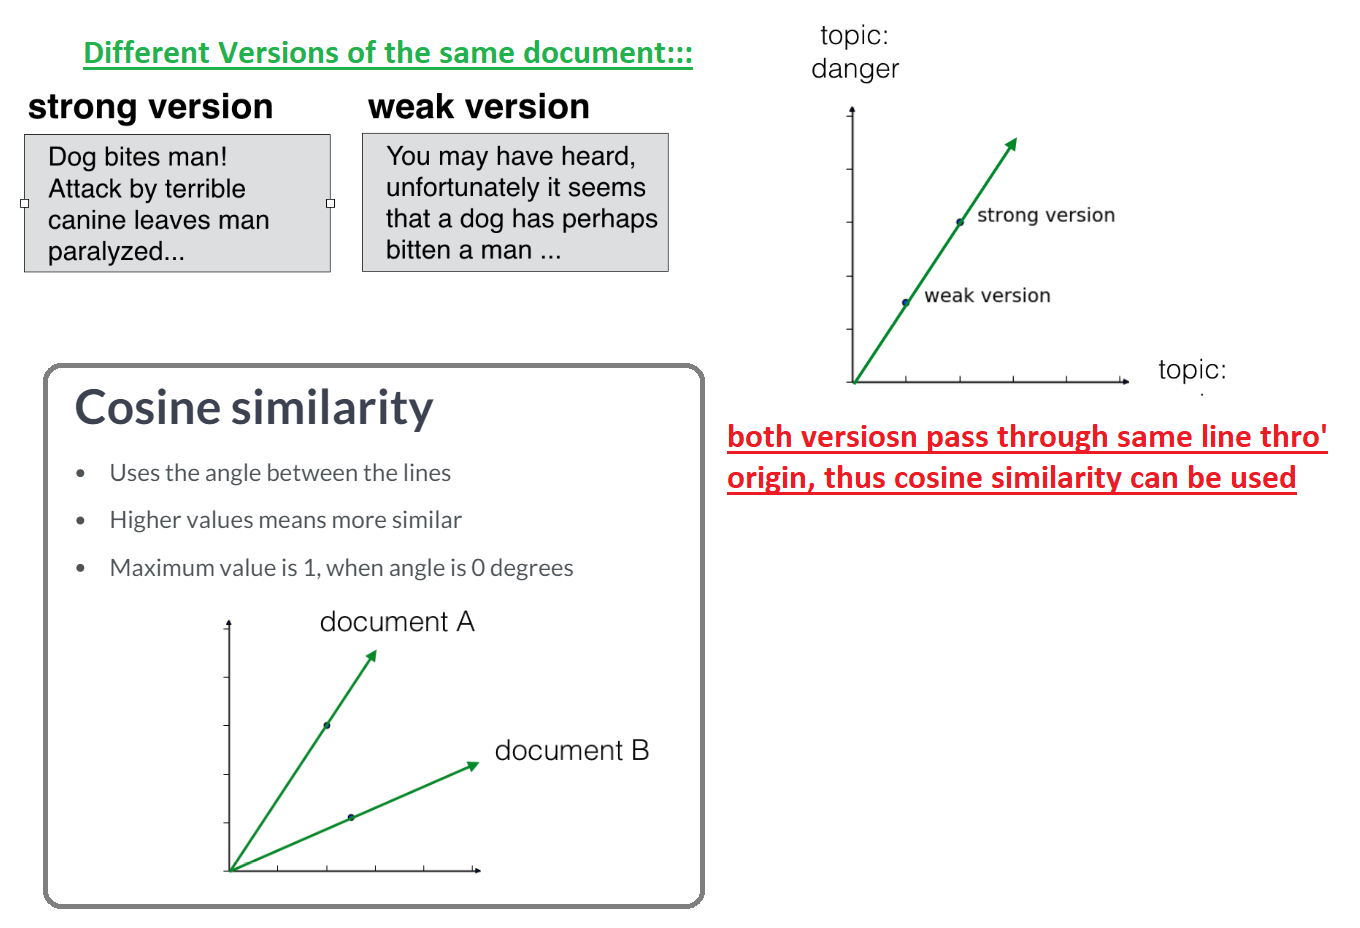

In [1386]:
##DATA
url="https://assets.datacamp.com/production/repositories/3842/datasets/8bae4cc436725404038a278f6439b096bebbfd34/movies_plot.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8'))).to_numpy()
plots = X[:,1]
movie_names = X[:,0]
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, max_features=1000,
                                   min_df=0.1, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)      
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf_matrix[0]

# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
print(tfidf_matrix.shape)

(1000, 172)


In [1387]:
from sklearn.decomposition import NMF
model = NMF(n_components=6)
model.fit(tfidf_matrix)
nmf_features = model.transform(tfidf_matrix)

In [1392]:
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=movie_names)
df.head(5)

,0,1,2,3,4,5
The Ballad of Cable Hogue,0.734492,0.330620,0.000000,0.588693,0.000000,0.068206
Monsters vs. Aliens,0.748057,0.215352,0.000000,0.589354,0.216095,0.000000
The Bandit Queen,0.014132,0.000000,0.023776,0.000000,0.921618,0.387111
Broken Arrow,0.000000,0.213459,0.000000,0.921886,0.000000,0.323360
Dolemite,0.967275,0.000000,0.166445,0.048877,0.119369,0.141552


<b> Movies Similar to Hulk </b>

In [1400]:
current_movie = df.loc['Hulk']
# Compute the dot products: similarities
similarities = df.dot(current_movie)             #COSINE SIMILARITY WITH ALL OTHER FEATURES
similarities.nlargest()

Hulk                                                1.000000
Warrior of the Lost World                           0.988782
Star Wars Episode IV: A New Hope (aka Star Wars)    0.986227
Knock Knock                                         0.981578
Logan                                               0.973193
dtype: float64

### Example - 4 :: Recommender Systems - Music Artists

In [1482]:
artist_names = pd.read_csv("dataset/artists.csv", header = None)
artist_names = artist_names.to_numpy().flatten()
data1 = pd.read_csv("dataset/scrobbler-small-sample.csv")

You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user

- 500 Users
- 111 Atrists

In [1466]:
X = data1.pivot_table(index='artist_offset', columns='user_offset', values = 'playcount')
X = X.fillna(0)
X

user_offset,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
artist_offset,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128.0,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,270.0,0.0,105.0,97.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,475.0,0.0
108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b> NOTE </b> ::
#MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. 

In [1470]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline


scaler = MaxAbsScaler()
nmf = NMF(n_components=20)


normalizer = Normalizer()        #you'll use the resulting normalized NMF features for recommendation!
pipeline = make_pipeline(scaler, nmf, normalizer)


norm_features = pipeline.fit_transform(X)

In [1485]:
df = pd.DataFrame(norm_features, index=artist_names)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Massive Attack,0.0,0.0,0.0,0.0,0.005678,0.0,0.0,0.054214,0.0,0.0,0.005066,0.0,0.001394,0.998132,0.0,0.0,0.0,0.0,0.027096,0.0
Sublime,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.005995,0.0,0.0,0.0,0.0,0.999982,0.0
Beastie Boys,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [1488]:
# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bob Dylan']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


Bob Dylan       1.000000
Neil Young      0.960705
Tom Waits       0.929415
Ryan Adams      0.913344
Van Morrison    0.899496
dtype: float64


# Applications

## Image Colour Quantization

- Reducing Number of Unique Colours to represent Images

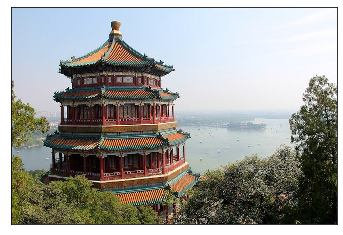

In [519]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [551]:
china.shape

(427, 640, 3)

In [550]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [522]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

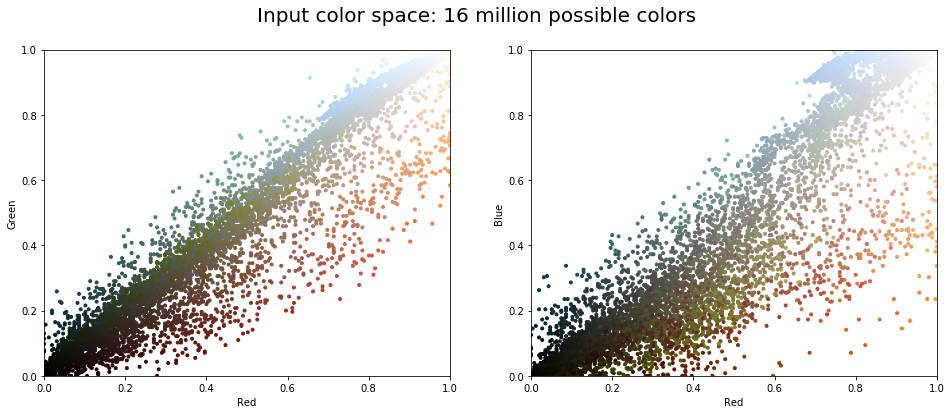

In [523]:
plot_pixels(data, title='Input color space: 16 million possible colors')

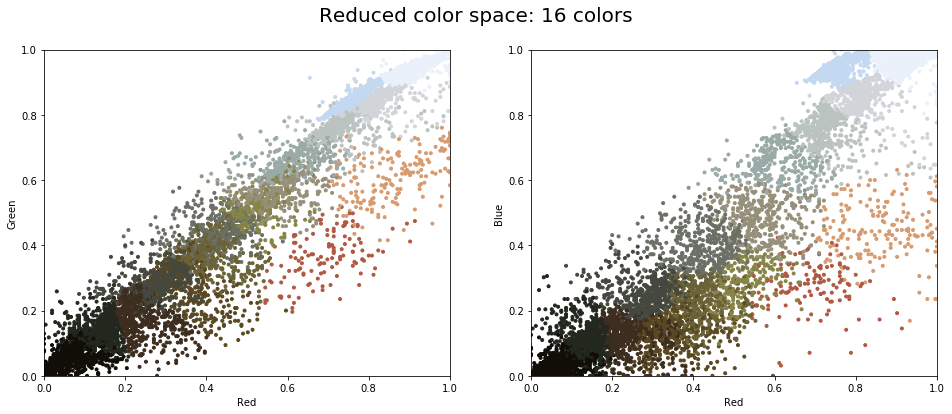

In [558]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

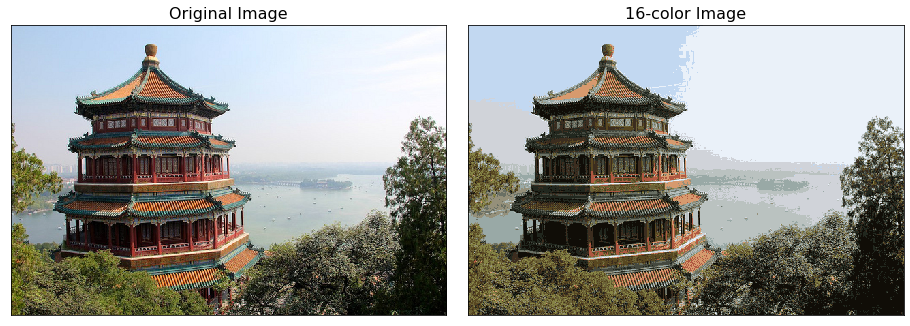

In [559]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

## Dominant Colours in Images

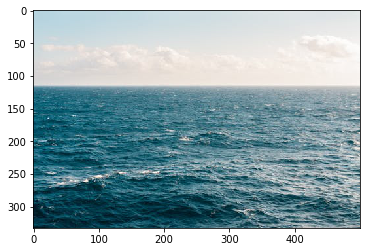

In [589]:
from scipy.cluster.vq import kmeans, vq
from PIL import Image
import requests
from io import BytesIO
response = requests.get("https://images.pexels.com/photos/1001682/pexels-photo-1001682.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500")
img = Image.open(BytesIO(response.content))
X = np.array(img)
plt.imshow(X)

In [583]:
R  = X[:,:,0].flatten()
B  = X[:,:,1].flatten()
G  = X[:,:,2].flatten()

In [650]:
pixels = pd.DataFrame({'red':R, 'blue': B, 'green':G})
pixels = pixels.astype('float')
pixels = pixels/pixels.std()
pixels.head()

,red,blue,green
0,2.188845,3.500983,4.110672
1,2.188845,3.500983,4.110672
2,2.188845,3.500983,4.110672
3,2.177077,3.484774,4.092563
4,2.177077,3.484774,4.092563


In [629]:
distortions_cache = []
cluster_size = range(1,10)

In [630]:
for i in cluster_size:
    centroids, distortion = kmeans(pixels, i)
    distortions_cache.append(distortion)

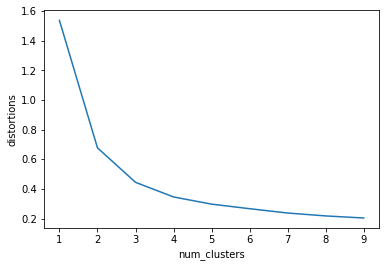

In [632]:
elbow_plot = pd.DataFrame({'num_clusters': cluster_size, 'distortions':distortions_cache})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
_=plt.xticks(cluster_size)

In [651]:
cluster_centers, distortion = kmeans(pixels, 3)

In [652]:
pixels = pd.DataFrame({'red':R, 'blue': B, 'green':G})
pixels = pixels.astype('float')

In [653]:
# Get standard deviations of each color
r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

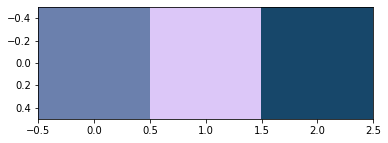

In [654]:
colors= []
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()

## Document Clustering

- Create TF-IDF Matrix from a Document
- Cluster the TF-IDF Matrix

- Tokenizing Data

<b> REMOVING NOISE </b> : Custom Toklenizer

In [693]:
from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)      #^ = All Except...
        if len(token) > 1 and token.lower() not in stop_words:
        # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [694]:
remove_noise("It is lovely weather we are having. I hope the weather continues.")

['it',
 'is',
 'lovely',
 'weather',
 'we',
 'are',
 'having',
 'hope',
 'the',
 'weather',
 'continues']

In [695]:
url="https://assets.datacamp.com/production/repositories/3842/datasets/8bae4cc436725404038a278f6439b096bebbfd34/movies_plot.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8'))).to_numpy()
plots = X[:,1]

In [696]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50,
                                   min_df=0.1, tokenizer=remove_noise)

tfidf_matrix = tfidf_vectorizer.fit_transform(plots)       #OUTPUT + SPARSE MATRIX

In [699]:
tfidf_matrix

<1000x50 sparse matrix of type '<class 'numpy.float64'>'
	with 23981 stored elements in Compressed Sparse Row format>

<b> Clustering of TF-IDF Matrix </b> :

<b> Note </b> : kmeans in Scipy does not work with sparse matrix, thus convert it to dense matrix first

In [706]:
num_clusters = 2
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()       #Top 50 terms

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['him', 'they', 'who']
['her', 'she', 'him']


## Clustering With Multiple Features

In [816]:
url="https://assets.datacamp.com/production/repositories/3842/datasets/10b1fd2d470d12f2486be7ffb05ab96a1b745631/fifa_18_sample_data.csv"
s=requests.get(url).content
fifa=pd.read_csv(io.StringIO(s.decode('utf-8')))
player_overall_features = fifa[['pac', 'sho', 'pas', 'dri', 'def', 'phy']].astype(float)
player_overall_features = player_overall_features / player_overall_features.std()
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 'scaled_def', 'scaled_phy']
player_overall_features.columns = scaled_features
fifa = pd.concat([fifa,player_overall_features], axis=1)
fifa.head(2)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,scaled_pac,scaled_sho,scaled_pas,scaled_dri,scaled_def,scaled_phy
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,7.739574,6.786319,9.287322,9.529970,1.648434,9.369397
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,7.653579,6.567405,9.740362,10.165301,1.298766,7.144165


In [823]:
from scipy.cluster.vq import kmeans, vq
centroids, _ = kmeans(player_overall_features, 2)
fifa['cluster_labels'],_ = vq(player_overall_features, centroids)

In [824]:
print(fifa.groupby('cluster_labels')[scaled_features].mean())

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 5.466037    3.688818    7.194355    6.789282    3.964164   
1                 6.685103    5.433988    8.452548    8.515229    2.487144   

                scaled_phy  
cluster_labels              
0                 9.206240  
1                 8.322103  


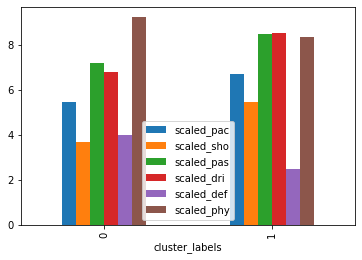

In [825]:
# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

In [826]:
# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.

## Clustering Stock Market Companies that Move Together

Cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). Each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins

In [1050]:
url="https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv"
s=requests.get(url).content
X=pd.read_csv(io.StringIO(s.decode('utf-8')))
X.head(3)

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021


In [1051]:
movements = X.to_numpy()
companies = movements[:,0]
movements = movements[:,np.arange(1,964)]

In [1059]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()                         #To Normalize data (independenlty unle standard scaler)

In [1061]:
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

In [1062]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
16       0                   General Electrics
18       0                       Goldman Sachs
5        0                     Bank of America
55       0                         Wells Fargo
26       0                      JPMorgan Chase
1        0                                 AIG
3        0                    American express
57       1                               Exxon
49       1                               Total
23       1                                 IBM
47       1                            Symantec
42       1                   Royal Dutch Shell
44       1                        Schlumberger
13       1                   DuPont de Nemours
12       1                             Chevron
35       1                            Navistar
10       1                      ConocoPhillips
53       1                       Valero Energy
8        1                         Caterpillar
43       1                                 SAP
58       2   